In [1]:
import numpy as np

batch1 = np.load('train_data_batch_1', allow_pickle=True)

In [2]:
batch1['data'][0].shape

(12288,)

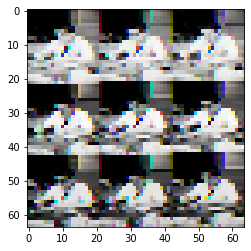

In [3]:
from matplotlib import pyplot as plt

plt.imshow(batch1['data'][15].reshape(64,64,3))
plt.show()


In [14]:
import pickle
# Note that this will work with Python3
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict


def load_data(input_file):

    d = unpickle(input_file)
    x = d['data']
    y = d['labels']

    x = np.dstack((x[:, :64*64], x[:, 64*64:64*64*2], x[:, 64*64*2:]))
    x = x.reshape((x.shape[0], 64, 64, 3))

    return x, y

def show_img(data):
    plt.imshow(data)
    plt.show()

In [15]:
s = """0    239   canoe
1   525   hourglass   
2   980   ipod
3   294   jinrikisha
4   770   kimono
5   304   table_lamp
6   374   lawn_mower
7   270   limousine
8   283   trailer_truck
9   585   nail
10   595   neck_brace
11   699   obelisk
12   354   oboe
13   333   organ
14   527   parking_meter
15   843   pay_phone
16   722   picket_fence
17   901   pill_bottle   
18   378   plunger
19   923   pole"""
list(map(int, s.split()[1::3]))

[239,
 525,
 980,
 294,
 770,
 304,
 374,
 270,
 283,
 585,
 595,
 699,
 354,
 333,
 527,
 843,
 722,
 901,
 378,
 923]

In [16]:
x, y = load_data("train_data_batch_1")
for idx in range(2, 11):
    print(len(x), len(y))
    filename = "train_data_batch_" + str(idx)
    x_, y_ = load_data(filename)
    x = np.concatenate((x, x_))
    y = np.concatenate((y, y_))

128116 128116
256232 256232
384348 384348
512464 512464
640580 640580
768696 768696
896812 896812
1024928 1024928
1153044 1153044


In [17]:
DL20_label = []
DL20_x = dict()
target = [239, 525, 980, 294, 770, 304, 374, 270, 283, 585, 595, 699, 354, 333, 527, 843, 722, 901, 378, 923]
for i, t in enumerate(target):
    temp = []
    print(i)
    for j, label in enumerate(y):
        if label == t:
            temp.append(x[j])
    DL20_x[t] = temp
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [18]:
len(DL20_x[239])

1300

In [22]:
DL20_x[239][0].shape

(64, 64, 3)

In [25]:
import pickle
for i, label in enumerate(target):
    filename = f"external_data_{i}.pkl"
    with open(filename,'wb') as f: 
        pickle.dump({"data":DL20_x[label], "Category":i}, f)


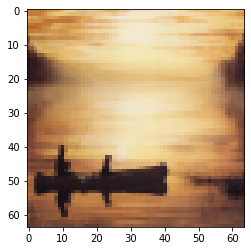

In [29]:
show_img(DL20_x[239][0])

In [37]:
import os
from PIL import Image

for x in range(20):
    idx = 0
    path = f"./DL20_extended/{x}"
    if not os.path.exists(path):
        os.mkdir(path)
    temp = DL20_x[target[x]]
    for img in temp:
        im = Image.fromarray(img)
        im.save(f"{path}/{idx}_{x}.png")
        idx += 1
    

In [4]:
import shutil
for t in ["train", "valid"]:
    for x in range(20):
        src_path = f"./DL20/{t}/{x}/"
        dst_path = f"./DL20_extended/{x}"
        files = os.listdir(src_path)
        for f in files:
            shutil.move(src_path + f, dst_path)


In [9]:
!python -m pip install torchvision

In [1]:
from torchvision import datasets
import torch
orig_set = datasets.ImageFolder("./DL20_extended/")  # your dataset
n = len(orig_set)  # total number of examples
n_test = int(0.15 * n)  # take ~10% for test
test_set = torch.utils.data.Subset(orig_set, range(n_test))
train_set = torch.utils.data.Subset(orig_set, range(n_test, n)) 

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(orig_set, test_size = 0.15, random_state=42)


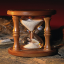

In [7]:
train_set[1000][0]

In [8]:
idx = 1
nm = {"train": train_set, "validation": test_set}
for dset in nm.keys():
    for x in range(20):
        path = f"./DL20_extended_split/{dset}/{str(x).zfill(2)}"
        if not os.path.exists(path):
            os.mkdir(path)


In [9]:
idx = 0
for dset in nm.keys():
    for img, label in nm[dset]:
        path = f"./DL20_extended_split/{dset}/{str(label).zfill(2)}"
        img.save(f"{path}/{idx}.png")
        idx += 1

In [10]:
idx

34167